# Run MCMC sampling
# Heavy minimal NO geometry

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import heavy_minimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

In [4]:
spec = 'minimal no geometry'

In [5]:
this_dark_nus_mcmc = heavy_minimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance='log', smoothing_pars=(0.1, 0.1))
df = this_dark_nus_mcmc.provide_df('cut_based')

heavy majorana


In [6]:
ndim = 3
from ctau_utils import ctau_heavy
def heavy_minimal_posterior_no_geometry(parameters):
    '''Posterior in the minimal model with no geometry: parameters = [m4, mz, log10_mu_Vmu4_alpha_epsilon2]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0]) or\
       (parameters[0] > this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1]) or\
       (parameters[1] < this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0]) or\
       (parameters[1] > this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1]) or\
       (parameters[0] >= parameters[1]) or\
       (parameters[2] <= this_dark_nus_mcmc.exp_analysis_obj.lower_bound_log10_Vmu4_alpha_epsilon2) or\
       (parameters[2] > this_dark_nus_mcmc.exp_analysis_obj.upper_bound_log10_Vmu4_alpha_epsilon2):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_Vmu4_alpha_epsilon2 = 10**parameters[2]
        ctau = ctau_heavy(parameters[0], 
                          parameters[1], 
                          actual_Vmu4_alpha_epsilon2, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(parameters[0], parameters[1]),
                                                         ctau=None,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['m4', 'mz', 'log10_Vmu4_alpha_epsilon2']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [7]:
this_dark_nus_mcmc.set_posterior(heavy_minimal_posterior_no_geometry, 
                                 ndim, 
                                 labels=labels)

In [8]:
n_walkers = 9
n_samples = 1
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool,
                                       set_backend=True, reset_backend=False, 
                                       blobs_dtype=blobs_dtype)
    this_dark_nus_mcmc.run_mcmc(n_samples)

100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
N/50 = 0;
tau: [0.52519804 0.52518743 0.29974327]
N/50 = 0;
tau: [0.95123979 0.94080186 1.05929067]
N/50 = 1;
tau: [2.40927231 2.9271024  3.00453565]
N/50 = 1;
tau: [6.84823767 4.99006837 6.33614839]
N/50 = 3;
tau: [12.29371886 11.37685132 11.3344425 ]
N/50 = 7;
tau: [26.30891986 25.531429   23.30879215]
N/50 = 15;
tau: [37.79553034 41.74221321 53.21668616]
N/50 = 35;
tau: [70.15118546 58.78468497 67.98700383]


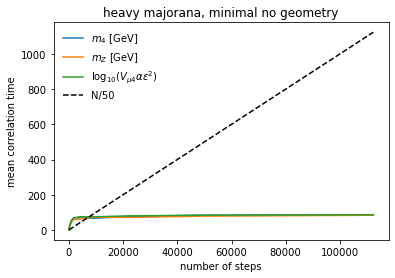

In [9]:
this_dark_nus_mcmc.compute_autocorrelation_time(store=True)

In [9]:
this_dark_nus_mcmc.get_samples(discard=2, thin=0.5)

(<Figure size 864x504 with 4 Axes>,
 array([<AxesSubplot:ylabel='$m_4$ [GeV]'>,
        <AxesSubplot:ylabel='$m_Z$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}(V_{\\mu 4}\\alpha \\epsilon^2)$'>,
        <AxesSubplot:xlabel='step number', ylabel='log(p)'>], dtype=object))

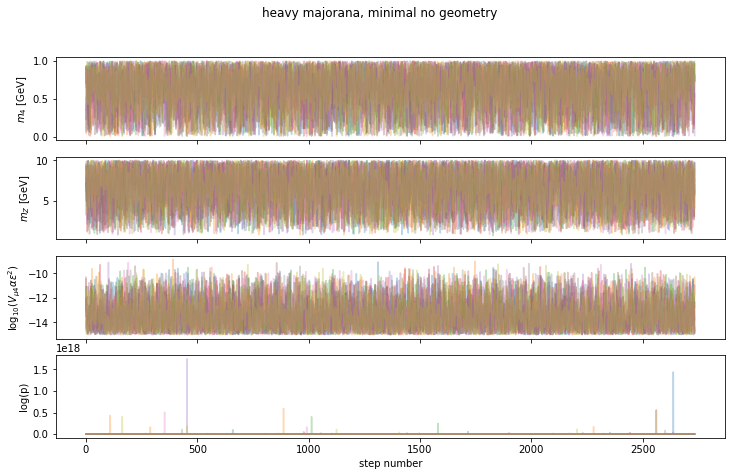

In [10]:
this_dark_nus_mcmc.plot_chains(store=True)

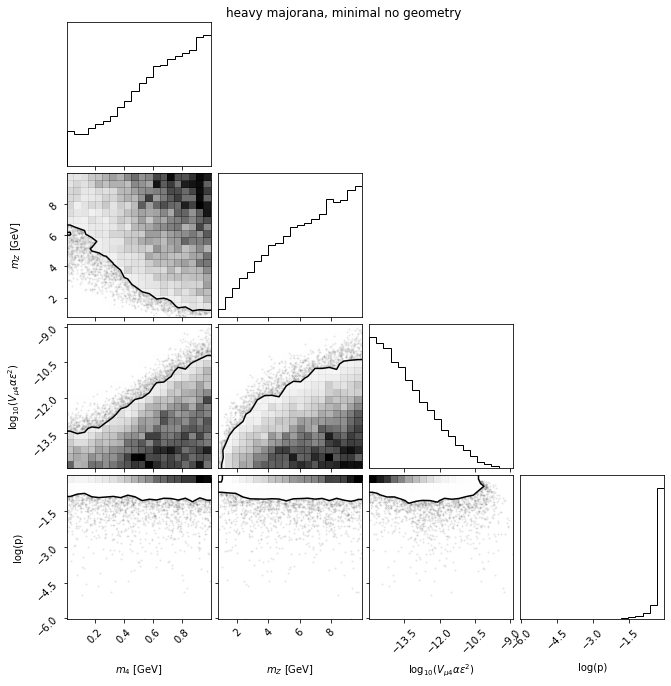

In [11]:
this_dark_nus_mcmc.corner_plot_rfaw(savefile='raw_corner')

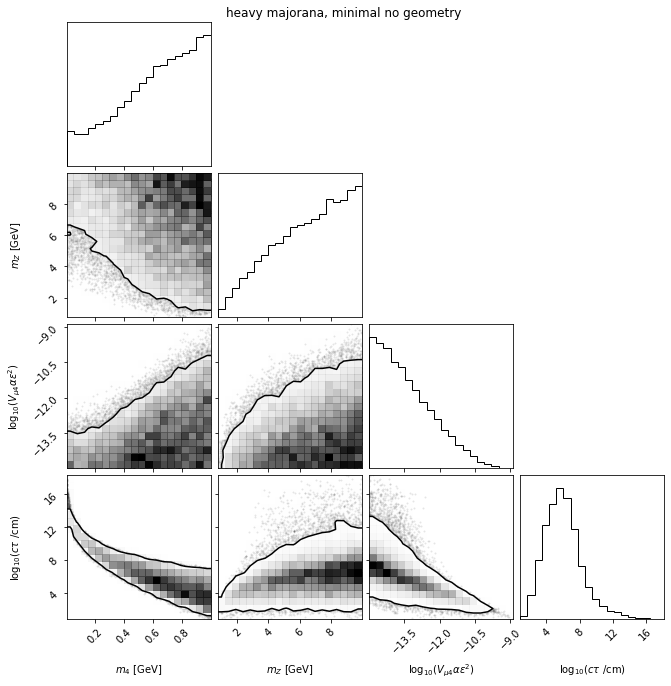

In [14]:
this_dark_nus_mcmc.corner_plot_physics(savefile='physics_corner')

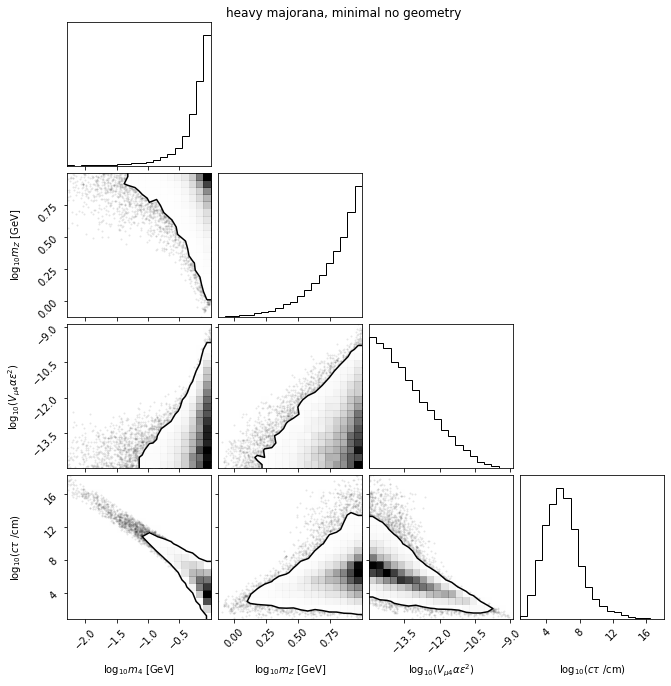

In [13]:
this_dark_nus_mcmc.corner_plot(which_labels=['log10_m4', 'log10_mz', 'log10_Vmu4_alpha_epsilon2', 'log10_ctau'], 
                               savefile='log_corner')

In [126]:
this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4_alpha_epsilon2

5.473014426954464e-07

In [14]:
print('Fraction of samples with null expectation =', (this_dark_nus_mcmc.samples['mu'] == 0).sum()/len(this_dark_nus_mcmc.samples))

Fraction of samples with null expectation = 0.0


Removed no burn in


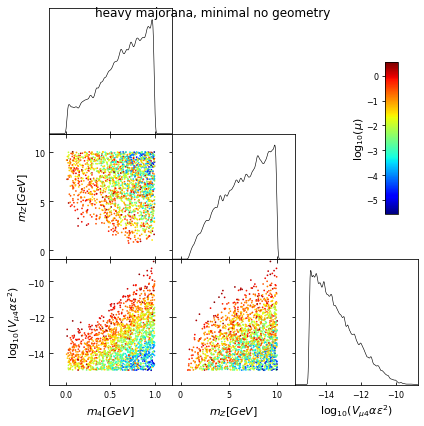

In [15]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_mu', savefile='corner_log10_mu')

Removed no burn in


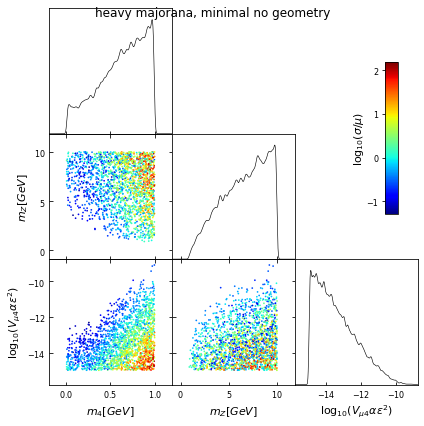

In [16]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_sigma/mu', savefile='corner_log10_sigma_mu')

Removed no burn in


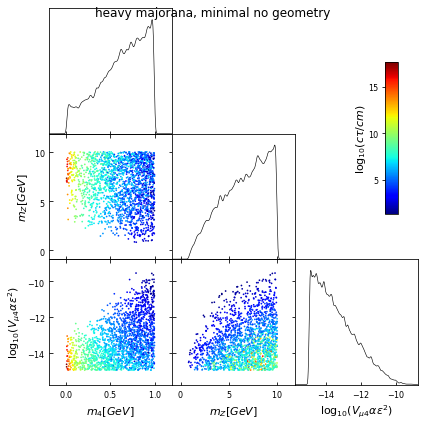

In [17]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_ctau', savefile='corner_log10_ctau')